# Описание задания

LinkedIn (/lɪŋktˈɪn/) — это платформа социальных сетей, ориентированная на бизнес и трудоустройство, которая работает через веб-сайты и мобильные приложения. Он был запущен 5 мая 2003 года. С декабря 2016 года он является 100% дочерней компанией Microsoft. Платформа в основном используется для профессионального общения и развития карьеры и позволяет соискателям публиковать свои резюме, а работодателям — размещать вакансии. С 2015 года большая часть доходов компании поступала от продажи доступа к информации о ее членах рекрутерам и специалистам по продажам. LinkedIn насчитывает более 970 миллионов зарегистрированных участников из более чем 200 стран и территорий.

Применение

Этот набор данных должен дать хорошее представление о том, как публика воспринимала приложение на протяжении многих лет. Используя этот набор данных, мы можем сделать следующее

Извлекайте настроения и тенденции
Определите, какая версия приложения получила больше всего положительных отзывов, а какая — худшая.
Используйте тематическое моделирование, чтобы определить болевые точки приложения.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import datetime as dt
import math as mt
from scipy import stats as st
import seaborn as sns
from plotly.express import histogram
from plotly.express import scatter
from plotly.express import imshow
from sklearn.feature_extraction.text import CountVectorizer
from plotly.express import treemap

In [39]:
df = pd.read_csv('/content/LINKEDIN_REVIEWS.csv',encoding='latin')

In [40]:
df.head()

Unnamed: 0                             review_id       pseudo_author_id  \
0           0  cd2c2a2c-750b-435c-823c-277a6dbcef2a  152618553977019693742   
1           1  ac8d5093-31ce-4f12-8c6b-ee79a06295ab  234382942865437071667   
2           2  bbae055c-f20b-4c01-b604-7cea72416a3a  174473604608358796368   
3           3  38a13596-b208-423d-8d96-3199e1993138  286593453219054880269   
4           4  9ddd29ce-b137-4286-9aa1-3bbdd0015e0a  167276875678680630145   

     author_name                                        review_text  \
0  A Google user  Well designed app. It's much easier to use tha...   
1  A Google user                                              Cool!   
2  A Google user           Great to finally see this on the market!   
3  A Google user                                          Great app   
4  A Google user  Finally! Would love a Homeycomb specific versi...   

   review_rating  review_likes author_app_version     review_timestamp  
0            5.0           0.0              1.0.3  2011-04-07 15:57:52  
1            5.0           1.0              1.0.0  2011-04-07 15:59:50  
2            5.0           0.0              2.0.5  2011-04-07 16:16:02  
3            5.0           1.0              1.0.0  2011-04-07 16:22:27  
4            4.0           0.0              1.0.0  2011-04-07 17:41:58

In [41]:
df.tail()

Unnamed: 0                             review_id  \
295354      295354  f2c00328-7336-4fec-be48-762f6bde6f46   
295355      295355  655d2d72-0d5a-4f37-9539-b90a4a680ddf   
295356      295356  abba79cc-6522-4352-bfb7-6737828ed9dd   
295357      295357  cfd5f964-793a-4e1d-9d07-c59b4fb4b855   
295358        2953                                   NaN   

             pseudo_author_id         author_name  \
295354  269815533566809403907        Ca********ez   
295355  241916916062491350927  Je**************on   
295356  252245267368626575958       Wi*********on   
295357  247408711937633692057        Ba********ed   
295358                    NaN                 NaN   

                                              review_text  review_rating  \
295354  Intento buscar un compaÃ±ero de Linkedin y no ...            4.0   
295355                                     Excellent ð            5.0   
295356       Business hours notifications option needed!!            3.0   
295357                                            Perfect            5.0   
295358                                                NaN            NaN   

        review_likes author_app_version     review_timestamp  
295354           0.0            4.1.688  2023-01-25 22:30:49  
295355           0.0            4.1.428  2023-01-25 22:34:33  
295356           1.0            4.1.775  2023-01-25 22:47:32  
295357           0.0            4.1.775  2023-01-25 23:54:47  
295358           NaN                NaN                  NaN

In [42]:
df.sample(random_state=1,n=15)

Unnamed: 0                             review_id  \
223465      223465  544abf49-57c5-4da6-8bb5-4d0592fb3122   
215339      215339  44c14f8c-0439-438d-9364-3df28fe26a83   
55647        55647  17553ab5-39d7-4a72-953e-8878692d3d16   
23822        23822  cae9810d-7f0e-480d-9e61-dc36c86198fe   
68578        68578  b1492d2c-1655-4663-9b1b-b0c6c47aea8e   
35166        35166  76b2da93-4a3a-453b-8c2f-7ccc26aa41dc   
187382      187382  afb2b7a0-cf80-4f0f-adb2-59960b7c4ed4   
192078      192078  5e7066e0-f51a-40c9-ae43-c2e0ddf05bb6   
70183        70183  3147af9d-5c8c-45a5-81be-76c0de7cfa82   
234523      234523  1ba7cbf1-eea0-41d8-943e-665ea97c11b9   
92969        92969  d3439f1d-0d86-4990-964d-13f689bd1251   
125171      125171  18b61969-a348-4f89-8ac9-a1f64b15f0e7   
252926      252926  ec1bfd59-dbb7-4075-a6f9-a6fb90904151   
87885        87885  3a03a578-9378-4cc2-976c-034344c6f2fa   
92645        92645  2a9cc3f6-2599-4154-a564-38be10596bc5   

             pseudo_author_id       author_name  \
223465  253764520245444776668      Ph********im   
215339  302534304193453196567         Ji*****le   
55647   310339336680651449784     A Google user   
23822   455787068310279156727     A Google user   
68578   278322471271561426579     A Google user   
35166   119104169773442015396     A Google user   
187382  679990808905539004877    Bi**********ma   
192078  300654855053682437152         Di*****ai   
70183   175099640481054974674     A Google user   
234523  150705522861843786315  Br************al   
92969   275461164498101973868     A Google user   
125171  587551896697187467914     A Google user   
252926  328006297421152818258           la***mi   
87885   940208428922034158332     A Google user   
92645   875824478631382504292     A Google user   

                                              review_text  review_rating  \
223465                              Great for networking!            5.0   
215339                     Shares way to much information            1.0   
55647                                               Super            5.0   
23822              Go on and down load. You won't regret.            5.0   
68578     Great app to get connect with professional life            4.0   
35166                                          Great idea            5.0   
187382  To share my business to pouples all over the w...            5.0   
192078                                            ,b, v ,            3.0   
70183                                                 Pro            3.0   
234523  It is great platform to connect with industry ...            5.0   
92969       The Best Communication With Each Academics...            5.0   
125171                                               Good            5.0   
252926                                               Good            5.0   
87885   After last update, I only get a white screen. ...            1.0   
92645   I have been a LinkedIn user for years.  Yet I ...            1.0   

        review_likes author_app_version     review_timestamp  
223465           0.0            4.1.554  2021-03-25 18:49:06  
215339           0.0                NaN  2021-01-08 11:47:23  
55647            0.0              3.4.5  2015-01-14 11:37:00  
23822            0.0              3.2.2  2013-12-31 17:13:48  
68578            1.0              3.4.9  2015-07-15 04:39:46  
35166            0.0              3.3.3  2014-04-30 10:21:56  
187382           0.0          4.1.459.1  2020-06-18 19:51:43  
192078           0.0            4.1.295  2020-07-13 06:00:13  
70183            0.0                NaN  2015-08-04 11:34:43  
234523           0.0                NaN  2021-07-03 14:50:53  
92969            0.0                NaN  2016-08-17 17:31:25  
125171           0.0                NaN  2018-03-19 14:22:03  
252926           0.0          4.1.649.1  2021-12-27 05:47:04  
87885            2.0             4.0.43  2016-05-20 18:34:30  
92645            8.0           4.0.57.1  2016-08-12 03:34:23

In [43]:
df.dtypes

Unnamed: 0              int64
review_id              object
pseudo_author_id       object
author_name            object
review_text            object
review_rating         float64
review_likes          float64
author_app_version     object
review_timestamp       object
dtype: object

In [44]:
df.shape

(295359, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295359 entries, 0 to 295358
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          295359 non-null  int64  
 1   review_id           295358 non-null  object 
 2   pseudo_author_id    295358 non-null  object 
 3   author_name         295358 non-null  object 
 4   review_text         293686 non-null  object 
 5   review_rating       295358 non-null  float64
 6   review_likes        295358 non-null  float64
 7   author_app_version  234147 non-null  object 
 8   review_timestamp    295358 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 20.3+ MB


In [46]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [47]:
df.shape

(295359, 8)

In [48]:
df.isna().mean()

review_id             0.000003
pseudo_author_id      0.000003
author_name           0.000003
review_text           0.005664
review_rating         0.000003
review_likes          0.000003
author_app_version    0.207246
review_timestamp      0.000003
dtype: float64

In [49]:
df = df.dropna(subset=['review_text','author_app_version'])

In [50]:
len(df)

232598

In [51]:
df.head()

review_id       pseudo_author_id    author_name  \
0  cd2c2a2c-750b-435c-823c-277a6dbcef2a  152618553977019693742  A Google user   
1  ac8d5093-31ce-4f12-8c6b-ee79a06295ab  234382942865437071667  A Google user   
2  bbae055c-f20b-4c01-b604-7cea72416a3a  174473604608358796368  A Google user   
3  38a13596-b208-423d-8d96-3199e1993138  286593453219054880269  A Google user   
4  9ddd29ce-b137-4286-9aa1-3bbdd0015e0a  167276875678680630145  A Google user   

                                         review_text  review_rating  \
0  Well designed app. It's much easier to use tha...            5.0   
1                                              Cool!            5.0   
2           Great to finally see this on the market!            5.0   
3                                          Great app            5.0   
4  Finally! Would love a Homeycomb specific versi...            4.0   

   review_likes author_app_version     review_timestamp  
0           0.0              1.0.3  2011-04-07 15:57:52  
1           1.0              1.0.0  2011-04-07 15:59:50  
2           0.0              2.0.5  2011-04-07 16:16:02  
3           1.0              1.0.0  2011-04-07 16:22:27  
4           0.0              1.0.0  2011-04-07 17:41:58

In [52]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [53]:
df.describe()

review_rating   review_likes
count  232598.000000  232598.000000
mean        3.971436       2.539669
std         1.460289      41.996046
min         0.000000       0.000000
25%         3.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000    8331.000000

In [54]:
df['review_id'].agg(['count','nunique'])

count      232598
nunique    232598
Name: review_id, dtype: int64

In [55]:
df['pseudo_author_id'].agg(['count','nunique'])

count      232598
nunique    232598
Name: pseudo_author_id, dtype: int64

In [56]:
df['author_name'].agg(['count','nunique'])

count      232598
nunique     69937
Name: author_name, dtype: int64

In [57]:
df['author_name'].value_counts(normalize=True)

A Google user                               0.588487
***                                         0.002395
****                                        0.001561
Sa*********ar                               0.000374
**                                          0.000297
                                              ...   
Fa**************id                          0.000004
Ga*********be                               0.000004
As**********************************â)    0.000004
Pa*******************************se         0.000004
Ba********ed                                0.000004
Name: author_name, Length: 69937, dtype: float64

In [58]:
df['review_text'].agg(['count','nunique'])

count      232598
nunique    155929
Name: review_text, dtype: int64

In [59]:
df['review_text'].value_counts()[:20]

Good         12203
Excellent     3813
Nice          3386
Great         3234
Awesome       1998
good          1931
Great app     1842
Good app      1690
Very good     1550
Nice app      1271
Ok            1183
Love it        738
Best           700
nice           613
Amazing        545
Super          474
Cool           470
Very nice      445
Superb         407
Fantastic      385
Name: review_text, dtype: int64

<Axes: >

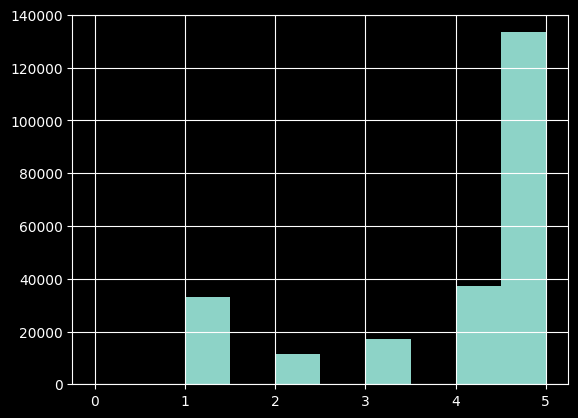

In [60]:
df['review_rating'].hist()

In [61]:
df['review_rating'].describe()

count    232598.000000
mean          3.971436
std           1.460289
min           0.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_rating, dtype: float64

<Axes: >

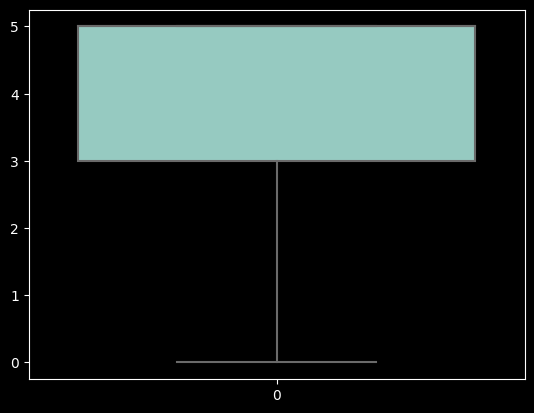

In [62]:
sns.boxplot(df['review_rating'])

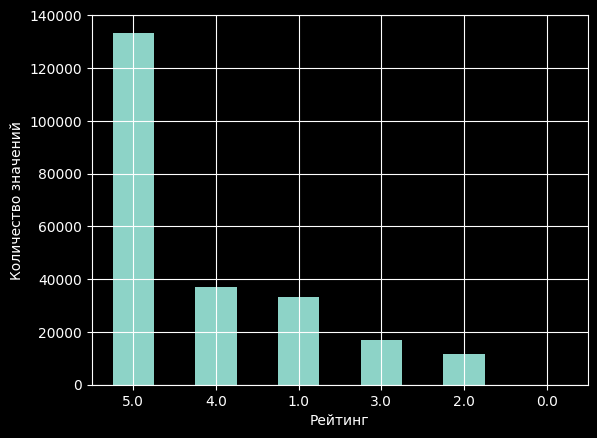

In [63]:
df['review_rating'].value_counts().plot(kind='bar',grid=True)
plt.xticks(rotation='horizontal')
plt.xlabel('Рейтинг')
plt.ylabel('Количество значений')
plt.show()

In [64]:
df['review_likes'].value_counts()

0.0       183630
1.0        21045
2.0         7866
3.0         4345
4.0         2893
           ...  
294.0          1
1612.0         1
356.0          1
323.0          1
2909.0         1
Name: review_likes, Length: 489, dtype: int64

<Axes: >

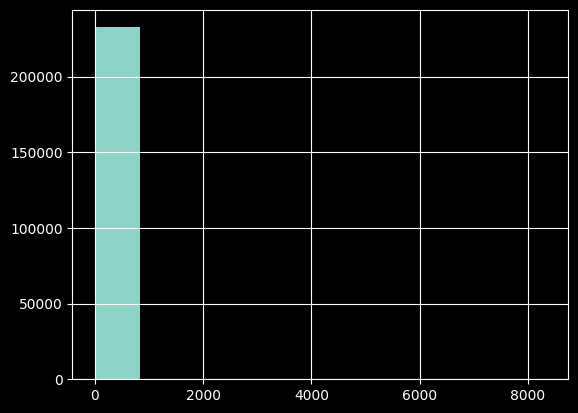

In [65]:
df['review_likes'].hist()

In [66]:
 df['review_likes'] = np.percentile(df['review_likes'],99)

<Axes: >

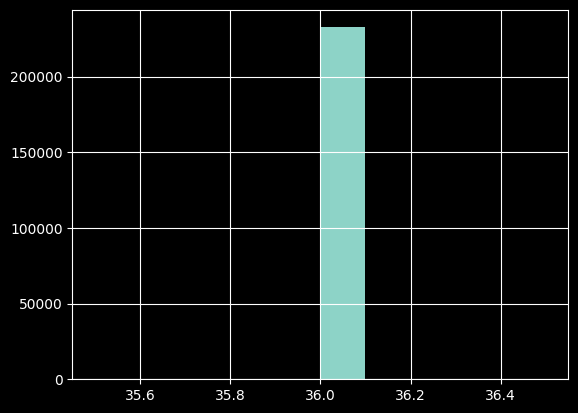

In [67]:
df['review_likes'].hist()

In [68]:
df.columns

Index(['review_id', 'pseudo_author_id', 'author_name', 'review_text',
       'review_rating', 'review_likes', 'author_app_version',
       'review_timestamp'],
      dtype='object')

In [69]:
df['author_app_version'].value_counts()

1.0.0      11737
3.2.1       3671
3.2         3540
3.4         3230
3.5.2.1     3227
           ...  
4.1.125        1
4.0.72         1
4.1.242        1
4.1.137        1
4.1.203        1
Name: author_app_version, Length: 437, dtype: int64

In [70]:
df['author_app_version'].agg(['count','nunique'])

count      232598
nunique       437
Name: author_app_version, dtype: int64

In [71]:
df[df['author_app_version'] == '1.0.0']

review_id       pseudo_author_id  \
1       ac8d5093-31ce-4f12-8c6b-ee79a06295ab  234382942865437071667   
3       38a13596-b208-423d-8d96-3199e1993138  286593453219054880269   
4       9ddd29ce-b137-4286-9aa1-3bbdd0015e0a  167276875678680630145   
5       e615eba7-021f-4252-9343-fea866e6547a  279544562364680964711   
6       cf51dd80-2b01-458a-8056-f792732e9fd8  194594231700116278497   
...                                      ...                    ...   
295303  7ca4bcaa-d60c-4a02-bb1f-8ed954684df2  123476290855639531788   
295311  84bb1a49-2320-4eb8-a0a7-7c842f1f6d64  628073002272667339036   
295319  e0508fa2-7bda-4ba9-b084-f17b2f96c299  184238943976750879774   
295320  85c55c55-9b24-43be-9207-f631d93de09e  324881148137383504378   
295328  53632c96-60d5-4787-97ce-829d01c40cae  172141679989772083587   

                              author_name  \
1                           A Google user   
3                           A Google user   
4                           A Google user   
5                           A Google user   
6                           A Google user   
...                                   ...   
295303  Ch*****************************an   
295311                      Ni*********da   
295319                       Pr********la   
295320                         Bi******la   
295328                       Sa********ma   

                                              review_text  review_rating  \
1                                                   Cool!            5.0   
3                                               Great app            5.0   
4       Finally! Would love a Homeycomb specific versi...            4.0   
5       Missing contact synching found in other apps l...            4.0   
6       What are you talking about? It does have synch...            5.0   
...                                                   ...            ...   
295303                                               @2l2            2.0   
295311                                               Good            5.0   
295319  15xxx5xx1x15xxxx5xx1x15xxx5xx1x15xxx5xxxx5x1x1...            1.0   
295320                               Free offers runs rrr            5.0   
295328                                       Etyu7j Ouyyy            5.0   

        review_likes author_app_version    review_timestamp  
1               36.0              1.0.0 2011-04-07 15:59:50  
3               36.0              1.0.0 2011-04-07 16:22:27  
4               36.0              1.0.0 2011-04-07 17:41:58  
5               36.0              1.0.0 2011-04-07 17:50:13  
6               36.0              1.0.0 2011-04-07 17:59:02  
...              ...                ...                 ...  
295303          36.0              1.0.0 2023-01-25 04:32:55  
295311          36.0              1.0.0 2023-01-25 09:06:21  
295319          36.0              1.0.0 2023-01-25 11:45:20  
295320          36.0              1.0.0 2023-01-25 11:55:38  
295328          36.0              1.0.0 2023-01-25 14:23:31  

[11737 rows x 8 columns]

In [72]:
df['review_timestamp'].agg(['min','max'])

min   2011-04-07 15:57:52
max   2023-01-25 23:54:47
Name: review_timestamp, dtype: datetime64[ns]

In [73]:
df['review_length'] = df['review_text'].str.len()

In [74]:
df.head(2)

review_id       pseudo_author_id    author_name  \
0  cd2c2a2c-750b-435c-823c-277a6dbcef2a  152618553977019693742  A Google user   
1  ac8d5093-31ce-4f12-8c6b-ee79a06295ab  234382942865437071667  A Google user   

                                         review_text  review_rating  \
0  Well designed app. It's much easier to use tha...            5.0   
1                                              Cool!            5.0   

   review_likes author_app_version    review_timestamp  review_length  
0          36.0              1.0.3 2011-04-07 15:57:52             73  
1          36.0              1.0.0 2011-04-07 15:59:50              5

В нашем распоряжении данные с 7 апреля 2011 по 28 декабря 2021 года

In [75]:
for columns in ['review_rating','review_likes','review_timestamp']:
    histogram(data_frame = df, x = columns, log_y = columns in {'review_likes'}).show()

In [76]:
scatter(data_frame=df.sample(50000,random_state=44565), x = 'review_length', y = 'review_likes',log_x=True,log_y = True, color = 'review_rating', hover_name = 'author_name')

In [77]:
imshow(img=df[['review_rating', 'review_length', 'review_likes']].corr())

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.express import treemap

NGRAM_RANGE = (1, 2)
TOPN = 100
negative = CountVectorizer(encoding='utf-8', stop_words='english', min_df=1000, max_df=0.3, lowercase=True, ngram_range=NGRAM_RANGE)
negative_result = negative.fit_transform(raw_documents=df[df['review_rating'] < 4].dropna(subset='review_text')['review_text'].values)
negative_df = pd.DataFrame(data={'word': negative.get_feature_names_out().tolist(), 'count': negative_result.toarray().sum(axis=0).tolist()})
print(negative_df.shape)
treemap(data_frame=negative_df.head(n=TOPN), path=['word'], names='word', values='count', color='count', height=800,
       color_continuous_scale='bluered', title = '{} {}-grams by count'.format(min(len(negative_df), TOPN), NGRAM_RANGE))

(92, 2)
